In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read from csv 
data_df = pd.read_csv('C:\\Users\\prudh\\Downloads\\Life Expectancy Data.csv')
print(data_df.head())
print(data_df.shape)

#strip the column names
data_df.columns = data_df.columns.str.strip()

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [4]:
#Data cleaning 
#print the number of duplicates
print(data_df.duplicated().sum())
#drop the duplicates
data_df = data_df.drop_duplicates()

0


In [5]:
#print the null values from each column
print(data_df.isnull().sum())
#fill the null values with the mean
data_df = data_df.fillna(data_df.mean())
print(data_df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64
Country                            0
Year                               0
Status                             0
Life expectancy   

C:\Users\prudh\AppData\Local\Temp\ipykernel_31908\4115627983.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_df = data_df.fillna(data_df.mean())


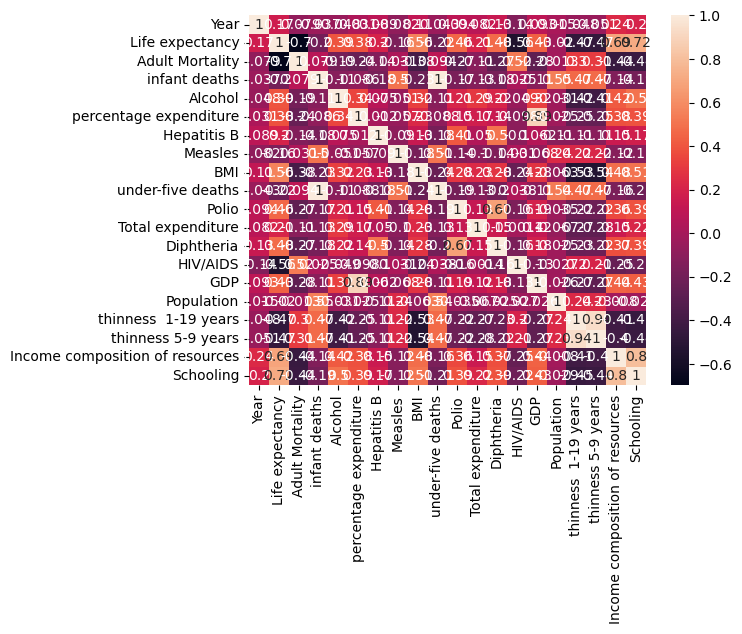

                                     Year  Life expectancy  Adult Mortality  \
Year                             1.000000         0.169623        -0.078861   
Life expectancy                  0.169623         1.000000        -0.696359   
Adult Mortality                 -0.078861        -0.696359         1.000000   
infant deaths                   -0.037415        -0.196535         0.078747   
Alcohol                         -0.048168         0.391598        -0.190408   
percentage expenditure           0.031400         0.381791        -0.242814   
Hepatitis B                      0.089398         0.203771        -0.138591   
Measles                         -0.082493        -0.157574         0.031174   
BMI                              0.108327         0.559255        -0.381449   
under-five deaths               -0.042937        -0.222503         0.094135   
Polio                            0.093820         0.461574        -0.272694   
Total expenditure                0.081860         0.

In [6]:
#create a heatmap of the correlation between the variables
sns.heatmap(data_df.corr(), annot=True)
plt.show()
print(data_df.corr())

Columns with correlation less than -0.2 with Life expectancy:
['Adult Mortality', 'under-five deaths', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years']
       Country  Year      Status  Life expectancy  infant deaths  Alcohol  \
0  Afghanistan  2015  Developing             65.0             62     0.01   
1  Afghanistan  2014  Developing             59.9             64     0.01   
2  Afghanistan  2013  Developing             59.9             66     0.01   
3  Afghanistan  2012  Developing             59.5             69     0.01   
4  Afghanistan  2011  Developing             59.2             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  Polio  \
0               71.279624         65.0     1154  19.1    6.0   
1               73.523582         62.0      492  18.6   58.0   
2               73.219243         64.0      430  18.1   62.0   
3               78.184215         67.0     2787  17.6   67.0   
4                7.097109         68.0     3013  17.2   

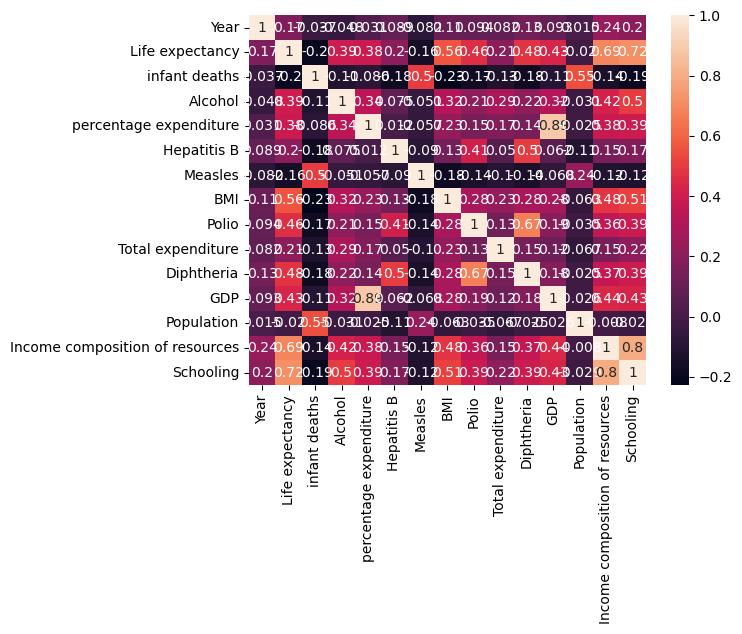

                                     Year  Life expectancy  infant deaths  \
Year                             1.000000         0.169623      -0.037415   
Life expectancy                  0.169623         1.000000      -0.196535   
infant deaths                   -0.037415        -0.196535       1.000000   
Alcohol                         -0.048168         0.391598      -0.113812   
percentage expenditure           0.031400         0.381791      -0.085612   
Hepatitis B                      0.089398         0.203771      -0.178783   
Measles                         -0.082493        -0.157574       0.501128   
BMI                              0.108327         0.559255      -0.227220   
Polio                            0.093820         0.461574      -0.170674   
Total expenditure                0.081860         0.207981      -0.126564   
Diphtheria                       0.133853         0.475418      -0.175156   
GDP                              0.093351         0.430493      -0.107109   

In [7]:
# Calculate correlation coefficients with Life expectancy column
corr_coef = data_df.corr()['Life expectancy']
# Filter for columns with correlation less than -0.2
no_corr_cols = corr_coef[corr_coef < -0.2].index.tolist()
# Print the names of the columns with low correlation
print("Columns with correlation less than -0.2 with Life expectancy:")
print(no_corr_cols)

#remove the columns with low correlation
data_df = data_df.drop(no_corr_cols, axis=1)
print(data_df.head())
print(data_df.shape)
print(data_df.columns)

#create a heatmap of the correlation between the variables
sns.heatmap(data_df.corr(), annot=True)
plt.show()
print(data_df.corr())

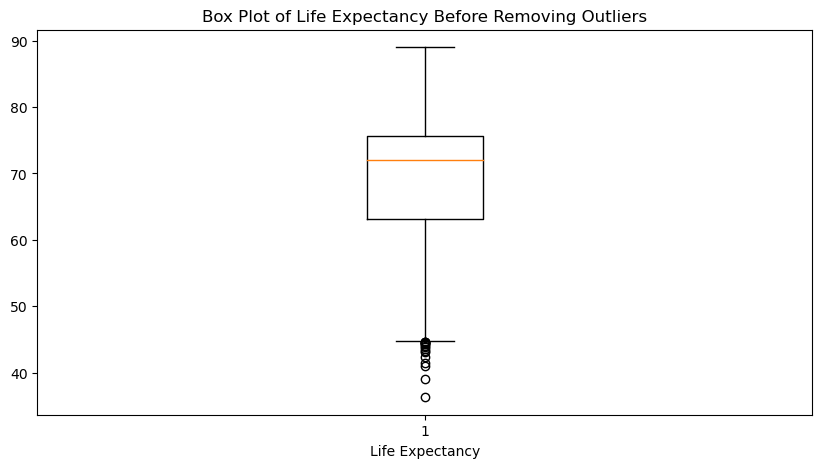

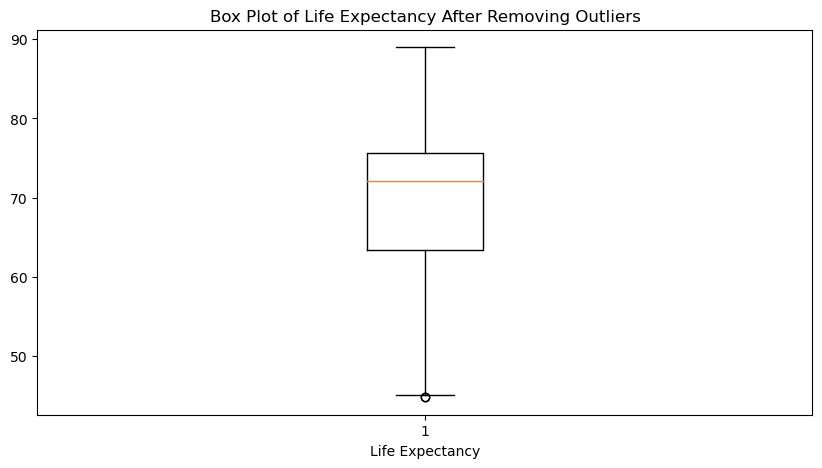

In [8]:
#Removing outliers
# Create box plot of Life expectancy before removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data_df["Life expectancy"])
plt.title("Box Plot of Life Expectancy Before Removing Outliers")
plt.xlabel("Life Expectancy")
plt.show()

# Identify and remove outliers using IQR method
Q1 = data_df["Life expectancy"].quantile(0.25)
Q3 = data_df["Life expectancy"].quantile(0.75)
IQR = Q3 - Q1
data_df_clean = data_df[~((data_df["Life expectancy"] < (Q1 - 1.5 * IQR)) | (data_df["Life expectancy"] > (Q3 + 1.5 * IQR)))]

# Create box plot of Life expectancy after removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data_df_clean["Life expectancy"])
plt.title("Box Plot of Life Expectancy After Removing Outliers")
plt.xlabel("Life Expectancy")
plt.show()

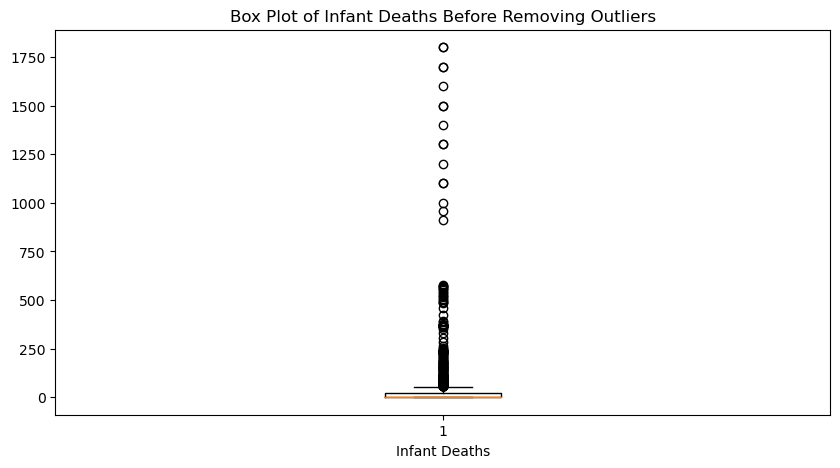

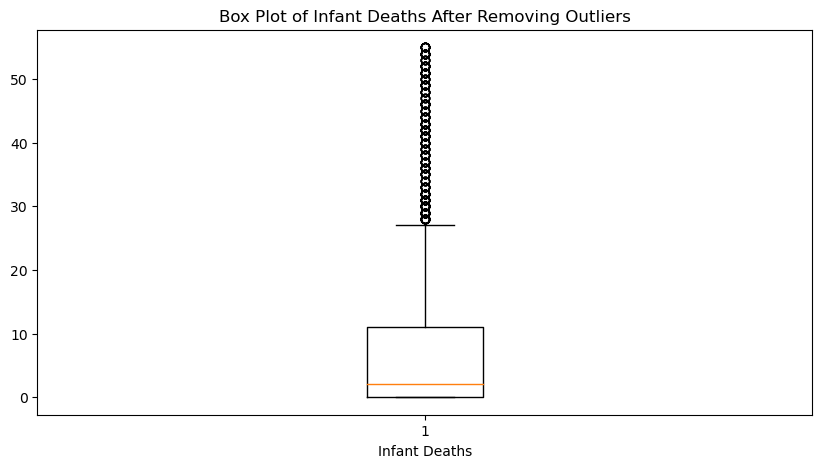

In [9]:
# Create box plot of infant deaths before removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data_df["infant deaths"])
plt.title("Box Plot of Infant Deaths Before Removing Outliers")
plt.xlabel("Infant Deaths")
plt.show()

# Identify and remove outliers using IQR method
Q1 = data_df["infant deaths"].quantile(0.25)
Q3 = data_df["infant deaths"].quantile(0.75)
IQR = Q3 - Q1
data_df_clean = data_df[~((data_df["infant deaths"] < (Q1 - 1.5 * IQR)) | (data_df["infant deaths"] > (Q3 + 1.5 * IQR)))]

# Create box plot of infant deaths after removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data_df_clean["infant deaths"])
plt.title("Box Plot of Infant Deaths After Removing Outliers")
plt.xlabel("Infant Deaths")
plt.show()

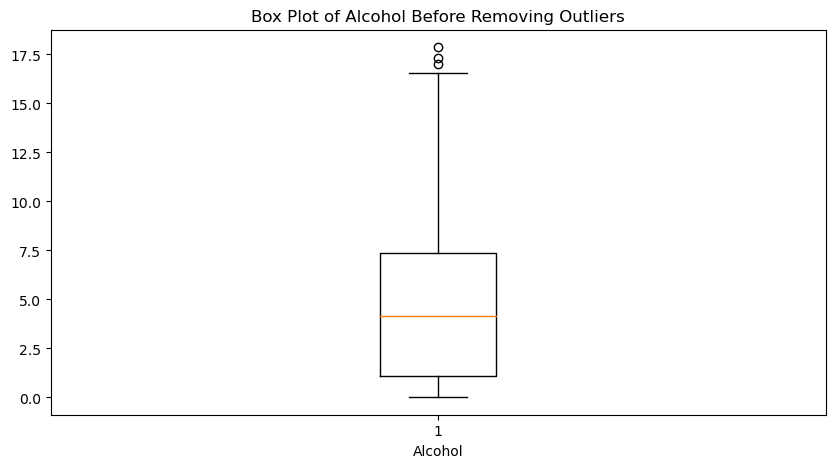

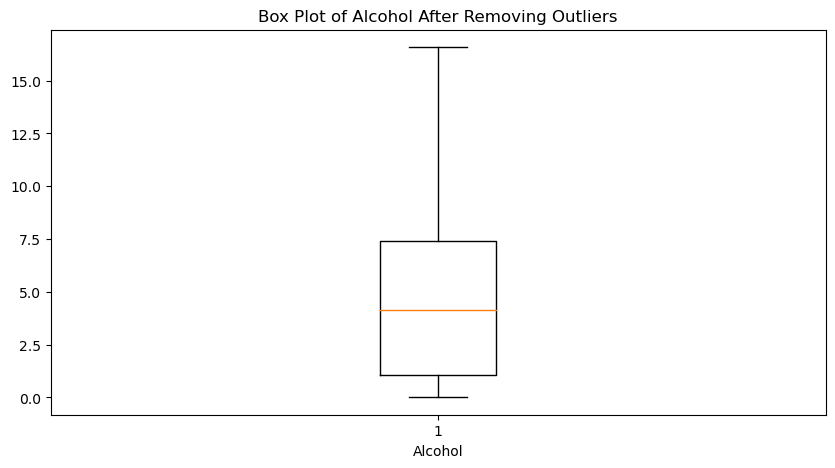

In [10]:
# Create box plot of Alcohol before removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data_df["Alcohol"].dropna())
plt.title("Box Plot of Alcohol Before Removing Outliers")
plt.xlabel("Alcohol")
plt.show()

# Identify and remove outliers using IQR method
Q1 = data_df["Alcohol"].quantile(0.25)
Q3 = data_df["Alcohol"].quantile(0.75)
IQR = Q3 - Q1
data_df_clean = data_df[~((data_df["Alcohol"] < (Q1 - 1.5 * IQR)) | (data_df["Alcohol"] > (Q3 + 1.5 * IQR)))]

# Create box plot of Alcohol after removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data_df_clean["Alcohol"].dropna())
plt.title("Box Plot of Alcohol After Removing Outliers")
plt.xlabel("Alcohol")
plt.show()


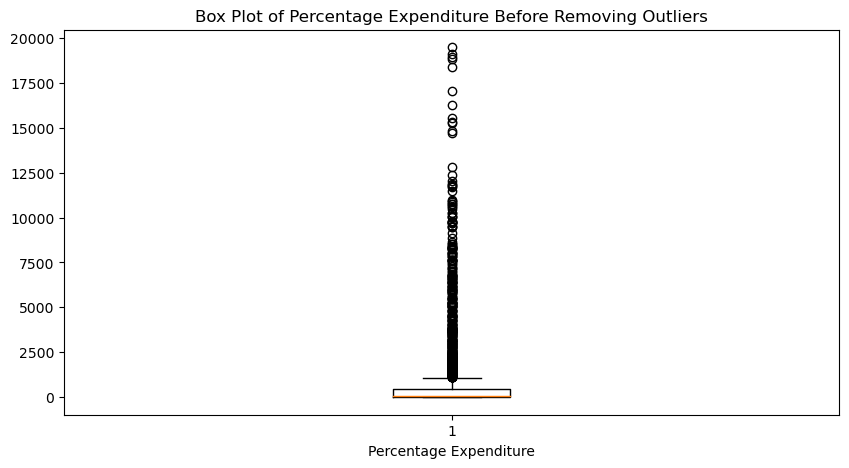

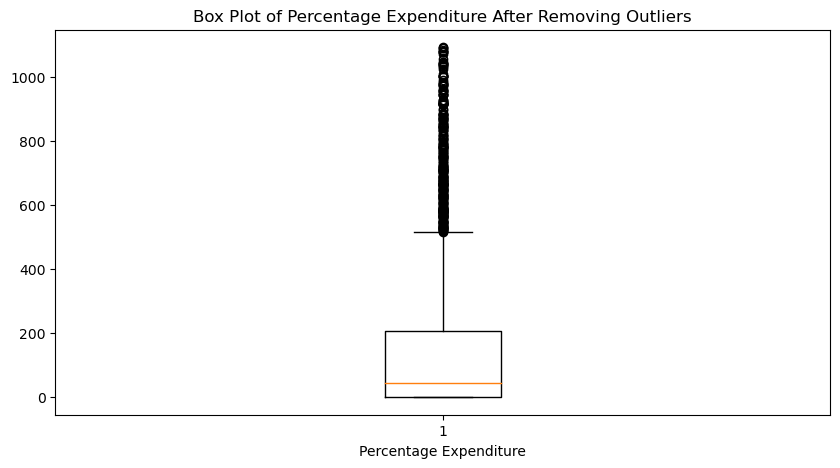

In [11]:
# Create box plot of Percentage Expenditure before removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data_df["percentage expenditure"])
plt.title("Box Plot of Percentage Expenditure Before Removing Outliers")
plt.xlabel("Percentage Expenditure")
plt.show()

# Identify and remove outliers using IQR method
Q1 = data_df["percentage expenditure"].quantile(0.25)
Q3 = data_df["percentage expenditure"].quantile(0.75)
IQR = Q3 - Q1
data_df_clean = data_df[~((data_df["percentage expenditure"] < (Q1 - 1.5 * IQR)) | (data_df["percentage expenditure"] > (Q3 + 1.5 * IQR)))]

# Create box plot of Percentage Expenditure after removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data_df_clean["percentage expenditure"])
plt.title("Box Plot of Percentage Expenditure After Removing Outliers")
plt.xlabel("Percentage Expenditure")
plt.show()

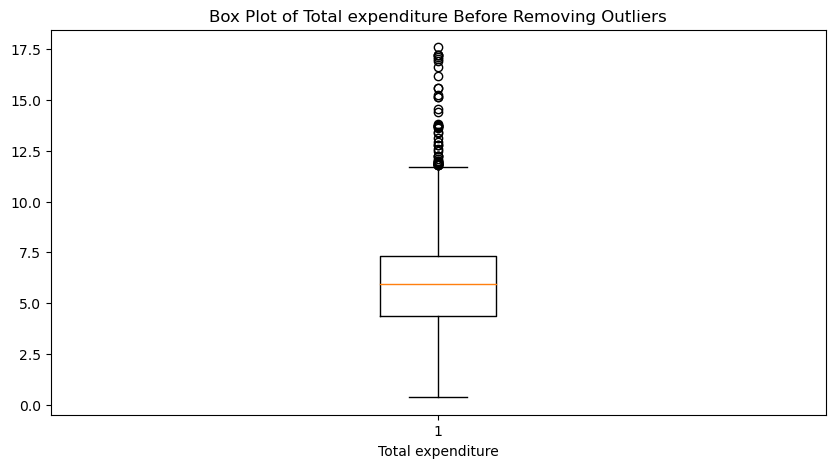

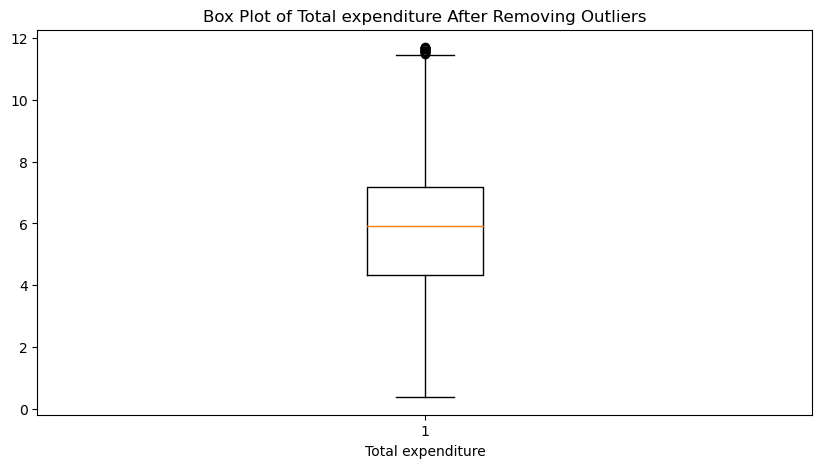

In [12]:
# Create box plot of Total expenditure before removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data_df["Total expenditure"].dropna())
plt.title("Box Plot of Total expenditure Before Removing Outliers")
plt.xlabel("Total expenditure")
plt.show()

# Identify and remove outliers using IQR method
Q1 = data_df["Total expenditure"].quantile(0.25)
Q3 = data_df["Total expenditure"].quantile(0.75)
IQR = Q3 - Q1
data_df_clean = data_df[~((data_df["Total expenditure"] < (Q1 - 1.5 * IQR)) | (data_df["Total expenditure"] > (Q3 + 1.5 * IQR)))]

# Create box plot of Polio after removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data_df_clean["Total expenditure"].dropna())
plt.title("Box Plot of Total expenditure After Removing Outliers")
plt.xlabel("Total expenditure")
plt.show()

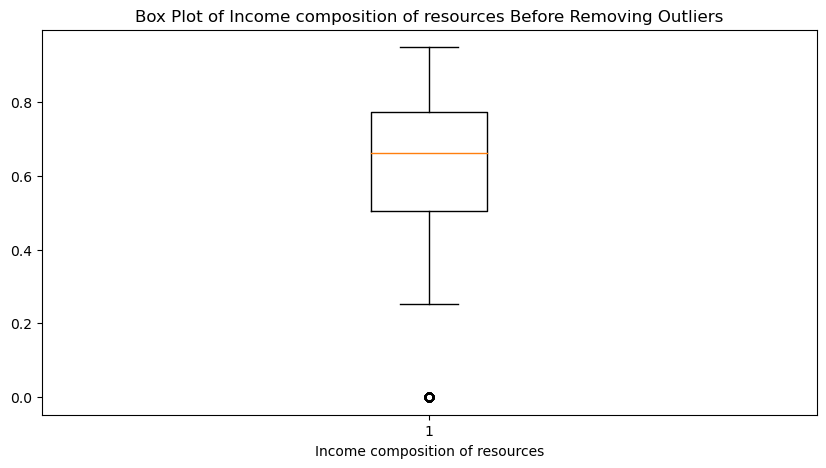

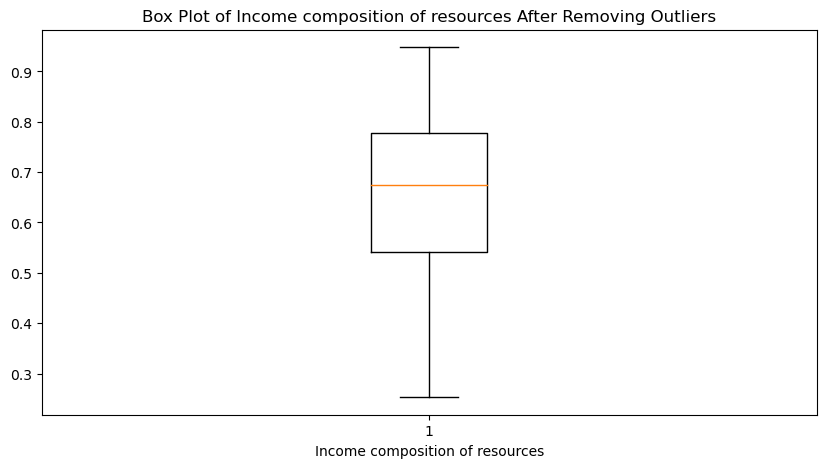

In [13]:
# Create box plot of Income composition of resources before removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data_df["Income composition of resources"].dropna())
plt.title("Box Plot of Income composition of resources Before Removing Outliers")
plt.xlabel("Income composition of resources")
plt.show()

# Identify and remove outliers using IQR method
Q1 = data_df["Income composition of resources"].quantile(0.25)
Q3 = data_df["Income composition of resources"].quantile(0.75)
IQR = Q3 - Q1
data_df_clean = data_df[~((data_df["Income composition of resources"] < (Q1 - 1.5 * IQR)) | (data_df["Income composition of resources"] > (Q3 + 1.5 * IQR)))]

# Create box plot of Polio after removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data_df_clean["Income composition of resources"].dropna())
plt.title("Box Plot of Income composition of resources After Removing Outliers")
plt.xlabel("Income composition of resources")
plt.show()

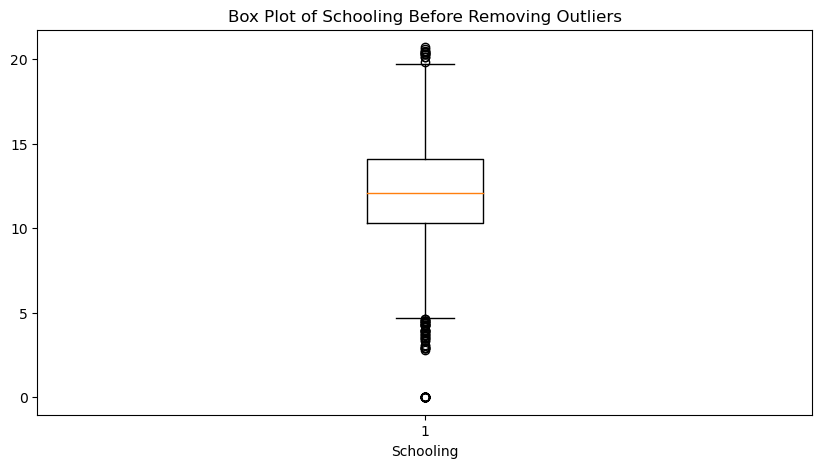

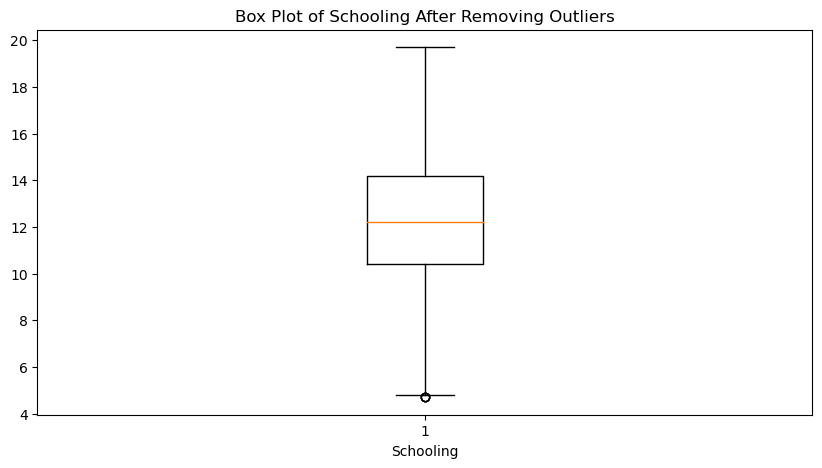

In [14]:
# Create box plot of Schooling before removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data_df["Schooling"].dropna())
plt.title("Box Plot of Schooling Before Removing Outliers")
plt.xlabel("Schooling")
plt.show()

# Identify and remove outliers using IQR method
Q1 = data_df["Schooling"].quantile(0.25)
Q3 = data_df["Schooling"].quantile(0.75)
IQR = Q3 - Q1
data_df_clean = data_df[~((data_df["Schooling"] < (Q1 - 1.5 * IQR)) | (data_df["Schooling"] > (Q3 + 1.5 * IQR)))]

# Create box plot of Schooling after removing outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data_df_clean["Schooling"].dropna())
plt.title("Box Plot of Schooling After Removing Outliers")
plt.xlabel("Schooling")
plt.show()

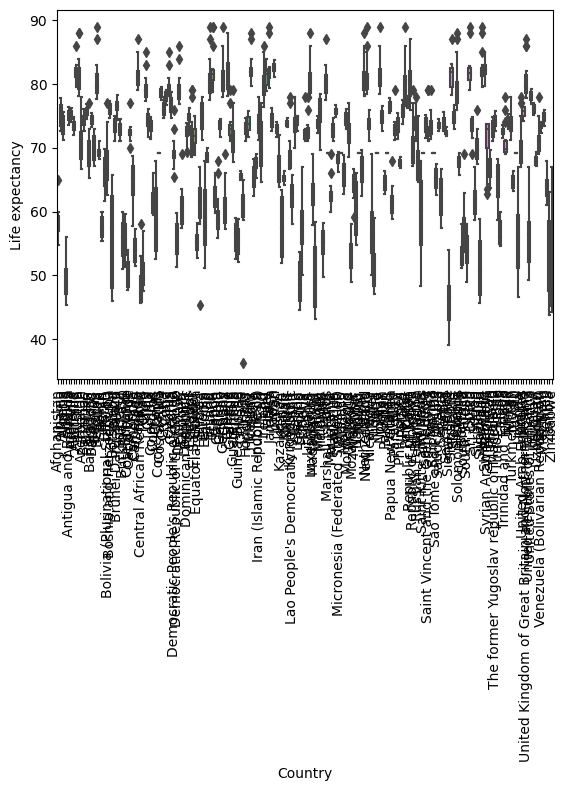

In [15]:
# Create a boxplot of life expectancy by country
sns.boxplot(x="Country", y="Life expectancy", data=data_df)
plt.xticks(rotation=90)
plt.show()

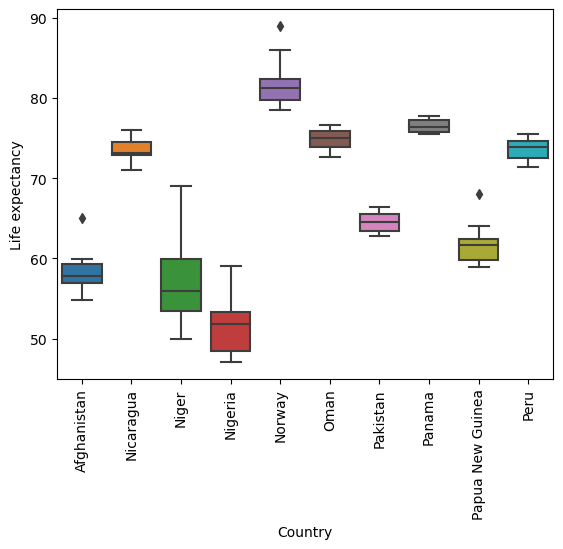

In [16]:
# Subset data to include only the first 10 countries
top_10_countries = data_df['Country'].value_counts().nlargest(10).index.tolist()
data_top10 = data_df[data_df['Country'].isin(top_10_countries)]
# Create a boxplot of life expectancy by country
sns.boxplot(x="Country", y="Life expectancy", data=data_top10)
plt.xticks(rotation=90)
plt.show()

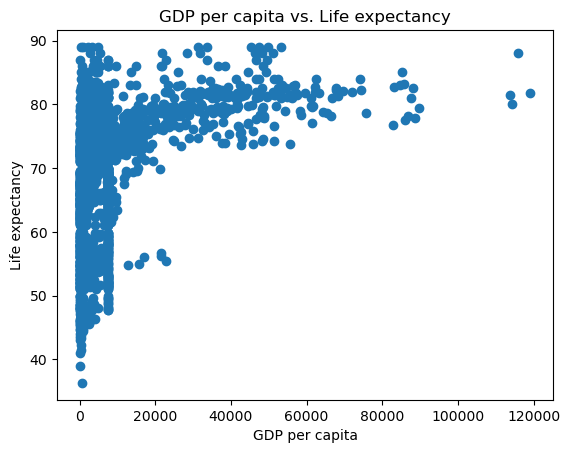

In [17]:
# Create a scatter plot of GDP per capita vs. life expectancy
plt.scatter(data_df['GDP'], data_df['Life expectancy'])
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.title('GDP per capita vs. Life expectancy')
plt.show()

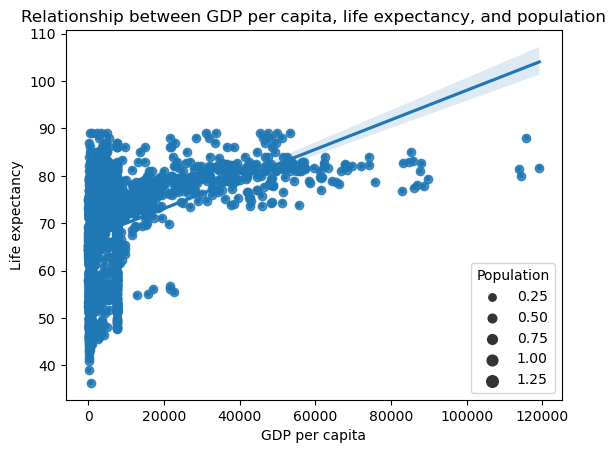

In [18]:
# Create a scatter plot with size of points proportional to population
sns.scatterplot(x="GDP", y="Life expectancy", size="Population", data=data_df)

# Add a trend line to the plot
sns.regplot(x="GDP", y="Life expectancy", data=data_df)

# Add axis labels and title to the plot
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.title('Relationship between GDP per capita, life expectancy, and population')
plt.show()

In [19]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


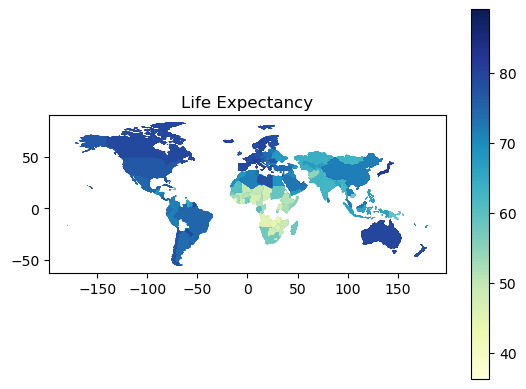

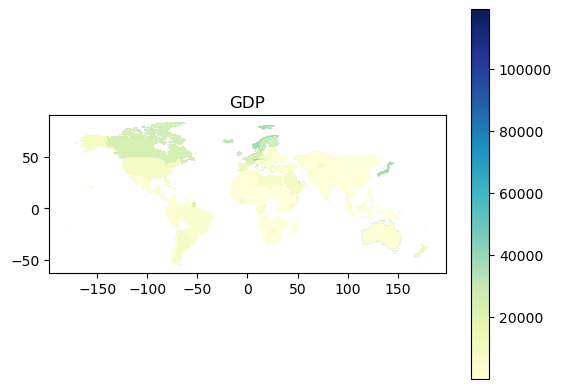

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

# Load the shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the data with the shapefile
merged = world.merge(data_df, left_on='name', right_on='Country')

# Create the choropleth map using the desired column
fig, ax = plt.subplots(1, 1)
merged.plot(column='Life expectancy', cmap='YlGnBu', ax=ax, legend=True)
ax.set_title('Life Expectancy')
plt.show()

fig, ax = plt.subplots(1, 1)
merged.plot(column='GDP', cmap='YlGnBu', ax=ax, legend=True)
ax.set_title('GDP')
plt.show()

In [22]:
import statsmodels.api as sm

# Define the predictor variables (GDP and government expenditure on health)
X = data_df[['GDP', 'percentage expenditure']]

# Add a constant to the predictor variables to estimate the intercept
X = sm.add_constant(X)

# Define the response variable (life expectancy)
y = data_df['Life expectancy']

# Fit a multiple linear regression model to the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     333.8
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.34e-131
Time:                        19:04:18   Log-Likelihood:                -10484.
No. Observations:                2938   AIC:                         2.097e+04
Df Residuals:                    2935   BIC:                         2.099e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     66

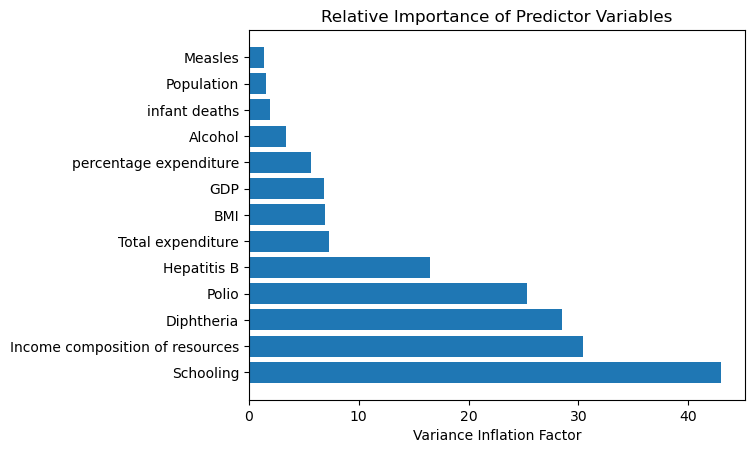

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the predictor variables (GDP, government expenditure, etc.)
X = data_df[['GDP', 'Total expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Population', 'Alcohol', 
                    'infant deaths', 'percentage expenditure', 'Income composition of resources', 'Schooling']]

# Calculate the variance inflation factor (VIF) for each variable
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_dict = dict(zip(X.columns, vif))

# Sort the variables by their VIF
sorted_vif = sorted(vif_dict.items(), key=lambda x: x[1], reverse=True)

# Plot the relative importance of each variable
plt.barh(range(len(sorted_vif)), [val[1] for val in sorted_vif])
plt.yticks(range(len(sorted_vif)), [val[0] for val in sorted_vif])
plt.xlabel('Variance Inflation Factor')
plt.title('Relative Importance of Predictor Variables')
plt.show()

In [24]:
data_df.to_csv('cleaned_data.csv', index=False)
print("Done")

Done
